In [4]:
import sys
sys.path.append('../codes/')

In [5]:
import os
import ast
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
from train import load_features, ModelingPipeline

In [7]:
%matplotlib inline

plt.rcParams['savefig.dpi'] = 200
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 10, 6

In [8]:
INPUT_DIR = "../processed_data/supervised_learning/"
OUTPUT_DIR = "../evaluations/best models/evals/"

In [9]:
best = pd.read_csv("../evaluations/best models/BestModels.csv")
best

,Batch,Model Name,Hyperparameters,Training Time (s),Testing Time (s),Accuracy at 10%,Precision at 10%,Recall at 10%,F1 at 10%,ROC AUC
0,0,Bagging,"{'n_estimators': 100, 'max_samples': 0.05, 'ma...",0.2104,0.0220,0.3655,1.0000,0.1354,0.2386,0.6506
1,0,Bagging,"{'n_estimators': 500, 'max_samples': 0.1, 'max...",1.0741,0.0818,0.3655,1.0000,0.1354,0.2386,0.6643
2,1,Random Forest,"{'n_estimators': 100, 'max_depth': 10, 'max_fe...",0.2733,0.1037,0.3711,1.0000,0.1365,0.2402,0.7057
3,2,Random Forest,"{'n_estimators': 300, 'max_depth': 15, 'max_fe...",0.6453,0.1048,0.3444,0.9829,0.1304,0.2303,0.7002
4,3,Random Forest,"{'n_estimators': 100, 'max_depth': 10, 'max_fe...",0.1845,0.1048,0.3639,0.9959,0.1355,0.2385,0.7055
5,4,KNN,"{'n_neighbors': 100, 'weights': 'uniform', 'me...",0.0708,0.3670,0.3754,0.9961,0.1375,0.2417,0.6908
6,4,KNN,"{'n_neighbors': 100, 'weights': 'uniform', 'me...",0.0708,0.3341,0.3754,0.9961,0.1375,0.2417,0.6908


In [12]:
args_dict = {'ask_user': False,
             'verbose': 1,
             'plot': False}

In [13]:
for batch, sub_dir in enumerate(next(os.walk(INPUT_DIR))[1]):
    dir_path = INPUT_DIR + "{}/".format(sub_dir)
    data = load_features(dir_path, labeled_test=True)
    train_pipe = ModelingPipeline(data, batch, cv=3, **args_dict)

    for name, hyp in best[["Model Name", "Hyperparameters"]].values:
        model_index = ModelingPipeline.MODEL_NAMES.index(name)
        hyp = ast.literal_eval(hyp)
        train_pipe.eval_best(model_index, hyp, OUTPUT_DIR, name + "-".join([str(x) for x in hyp.values()]) + ".csv")

##----------------------------------------------------------------------------------------------------------------------------------------------------------------##
<BATCH 0; Pipeline Setup>
Config: 3-Fold Cross-Validation;
Do NOT Ask User for Model and Metrics;
Level of Verbosity: 1; 
Do NOT Include Plots for Evaluations
	Finished reading processed data.
	3-fold cross-validation generator set up with random seed '123'.
##----------------------------------------------------------------------------------------------------------------------------------------------------------------##


##----------------------------------------------------------------------------------------------------------------------------------------------------------------##
<BATCH 0; Model Configured. Bagging.>
##----------------------------------------------------------------------------------------------------------------------------------------------------------------##


##-------------------------------------

<BATCH 2; Model Configured. Random Forest.>
##----------------------------------------------------------------------------------------------------------------------------------------------------------------##


##----------------------------------------------------------------------------------------------------------------------------------------------------------------##
<BATCH 2; Model Configured. KNN.>
##----------------------------------------------------------------------------------------------------------------------------------------------------------------##


##----------------------------------------------------------------------------------------------------------------------------------------------------------------##
<BATCH 2; Model Configured. KNN.>
##----------------------------------------------------------------------------------------------------------------------------------------------------------------##
<BATCH 3; Pipeline Setup>
Config: 3-Fold Cross-Validation;


In [14]:
data1 = pd.read_csv(OUTPUT_DIR + "Bagging100-0.5-30_plot.csv")
data2 = pd.read_csv(OUTPUT_DIR + "Bagging500-0.1-30_plot.csv")
data3 = pd.read_csv(OUTPUT_DIR + "KNN100-uniform-euclidean_plot.csv")
data4 = pd.read_csv(OUTPUT_DIR + "Random Forest100-10-5_plot.csv")
data5 = pd.read_csv(OUTPUT_DIR + "Random Forest100-10-15_plot.csv")
data6 = pd.read_csv(OUTPUT_DIR + "Random Forest300-15-5_plot.csv")

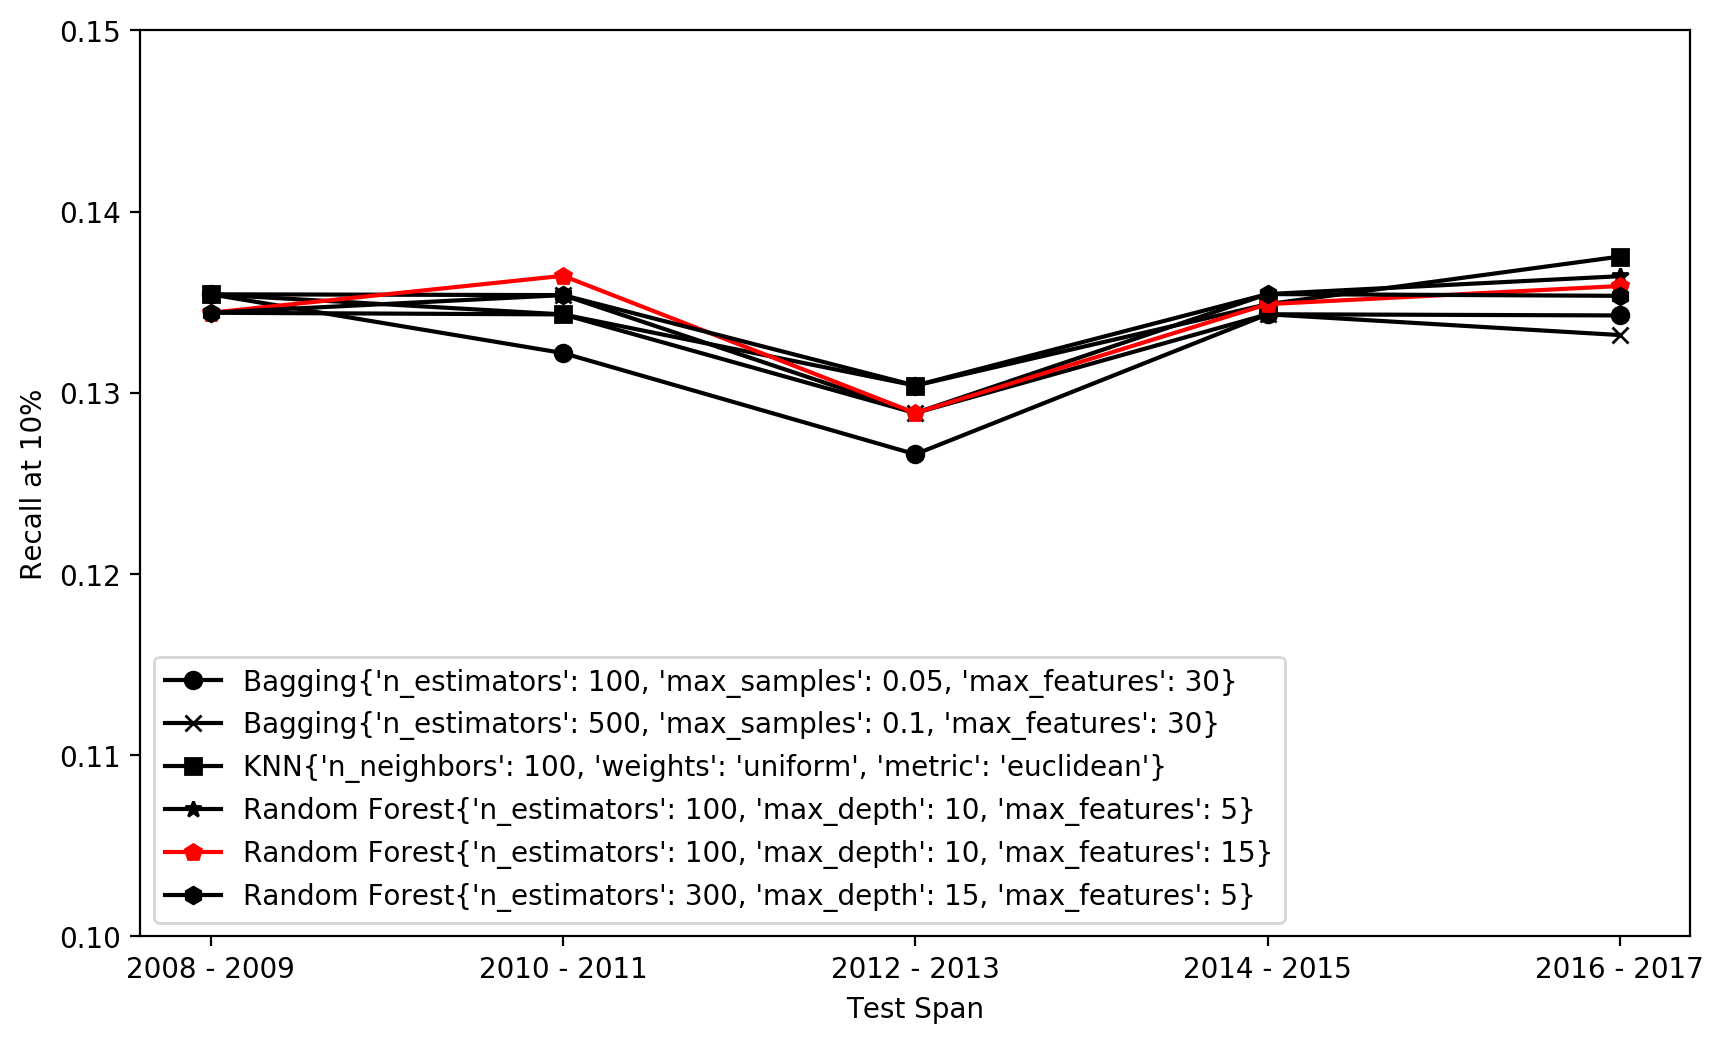

In [15]:
plt.plot(data1.Batch, data1.Recall, 'ko-', label=data1.Legend[0])
plt.plot(data2.Batch, data2.Recall, 'kx-', label=data2.Legend[0])
plt.plot(data3.Batch, data3.Recall, 'ks-', label=data3.Legend[0])
plt.plot(data4.Batch, data4.Recall, 'k*-', label=data4.Legend[0])
plt.plot(data5.Batch, data5.Recall, 'rp-', label=data5.Legend[0])
plt.plot(data6.Batch, data6.Recall, 'kh-', label=data6.Legend[0])

plt.xlabel('Test Span')
plt.ylabel('Recall at 10%')
plt.ylim(0.1, 0.15)
plt.legend()
plt.savefig(OUTPUT_DIR + 'recommended_model.png')

In [18]:
idx, labels = train_pipe.label(2, {'n_estimators': 100, 'max_depth': 10, 'max_features': 15})

##----------------------------------------------------------------------------------------------------------------------------------------------------------------##


##----------------------------------------------------------------------------------------------------------------------------------------------------------------##
<BATCH 4; Model Configured. Random Forest.>


In [19]:
test4 = pd.read_csv("../data/train test sets/Batch 4/test.csv")

In [20]:
test4.shape

(2552, 26)

In [21]:
idx.shape

(2552,)

In [34]:
ordered = test4.iloc[idx]
ordered['predicted'] = pd.Series(labels, index=idx)
ordered.head()

,elevation,DIS_LAKE,DIS_MAJOR_RIVER,DIS_OCEAN,DIS_RIVER,PRECAVNEW80_08,TEMPAV_8008,ethin_div,HighRelig,ChrCatP,...,nkill_past_5,nwound_past_2,nwound_past_5,attacktype_past_2,attacktype_past_5,targettype_past_2,targettype_past_5,group_name_past_2,group_name_past_5,predicted
1377,28.6549,528098.8,1319179.0,28654.90,1033921.0,280.853452,19.318103,1.0,Muslims,2-5%,...,916.0,315.0,1424.0,6,6,11,16,5,20,1
1654,342.7634,178008.6,1022060.0,342763.40,531759.7,391.622414,19.032542,1.0,Muslims,0-2%,...,605.0,417.0,489.0,4,5,8,9,3,4,1
1301,11.7896,89369.8,1584745.0,11789.60,1465263.0,NaN,NaN,1.0,Muslims,0-2%,...,256.0,175.0,242.0,6,7,9,12,2,5,1
1300,11.7896,89369.8,1584745.0,11789.60,1465263.0,NaN,NaN,1.0,Muslims,0-2%,...,116.0,59.0,67.0,7,7,11,12,2,5,1
514,38.7690,973689.0,1945390.0,38769.03,1419289.0,163.434480,23.692432,1.0,Muslims,0-2%,...,882.0,51.0,288.0,6,7,7,12,5,6,1


In [39]:
ordered.to_csv("../evaluations/best models/predictions/labelled_test_set.csv")

In [42]:
intervention_list = ordered[ordered.predicted == 1]
intervention_list.drop("predicted", axis=1, inplace=True)
intervention_list.head()

,elevation,DIS_LAKE,DIS_MAJOR_RIVER,DIS_OCEAN,DIS_RIVER,PRECAVNEW80_08,TEMPAV_8008,ethin_div,HighRelig,ChrCatP,...,nkill_past_2,nkill_past_5,nwound_past_2,nwound_past_5,attacktype_past_2,attacktype_past_5,targettype_past_2,targettype_past_5,group_name_past_2,group_name_past_5
1377,28.6549,528098.8,1319179.0,28654.90,1033921.0,280.853452,19.318103,1.0,Muslims,2-5%,...,192.0,916.0,315.0,1424.0,6,6,11,16,5,20
1654,342.7634,178008.6,1022060.0,342763.40,531759.7,391.622414,19.032542,1.0,Muslims,0-2%,...,511.0,605.0,417.0,489.0,4,5,8,9,3,4
1301,11.7896,89369.8,1584745.0,11789.60,1465263.0,NaN,NaN,1.0,Muslims,0-2%,...,140.0,256.0,175.0,242.0,6,7,9,12,2,5
1300,11.7896,89369.8,1584745.0,11789.60,1465263.0,NaN,NaN,1.0,Muslims,0-2%,...,66.0,116.0,59.0,67.0,7,7,11,12,2,5
514,38.7690,973689.0,1945390.0,38769.03,1419289.0,163.434480,23.692432,1.0,Muslims,0-2%,...,206.0,882.0,51.0,288.0,6,7,7,12,5,6


In [43]:
intervention_list.to_csv("../evaluations/best models/predictions/intervention_list.csv")